In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [5]:
#Cargar dataset y mostrar las 5 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
#solicitamos informació del DB que se carga, vemos que tiene 1599 filas y 12 columnas
data.shape

(1599, 12)

In [10]:
#mepdimos la descripción de valores totales, media, estandar, minimo., maximo y %
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
#verificamos valores nulos y para este ejercicio no se tiene ninguno.
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([  2.,  27., 134., 361., 555., 352., 132.,  29.,   3.,   4.]),
 array([2.74 , 2.867, 2.994, 3.121, 3.248, 3.375, 3.502, 3.629, 3.756,
        3.883, 4.01 ]),
 <BarContainer object of 10 artists>)

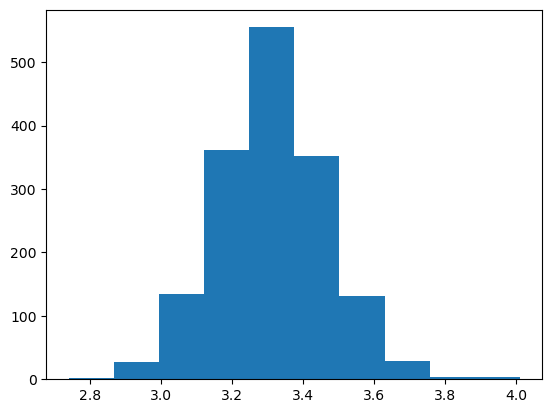

In [15]:
# mediante este histograma revisamos el ph que tiene cada tipo de vino y encontramos que la mayor cantidad cuentan con un PH de 3.3
plt.hist(data.pH)

<Axes: xlabel='free sulfur dioxide', ylabel='sulphates'>

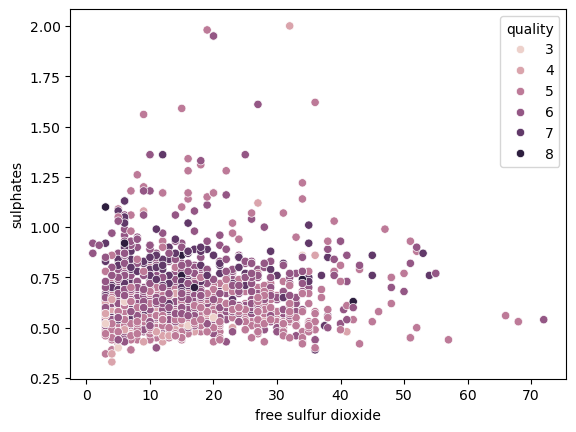

In [20]:
sns.scatterplot(x ="free sulfur dioxide", y = "sulphates" , hue = "quality" , data = data )
#Con base a los vinos con un promedio de sulfato y contenido de dioxido de sulfuro, los de mejor calidad se encuentran en un promedio 0.75 y 1

In [21]:
# para tener este diagrama, fue necesario instalar la librería seaborn
import seaborn as sns

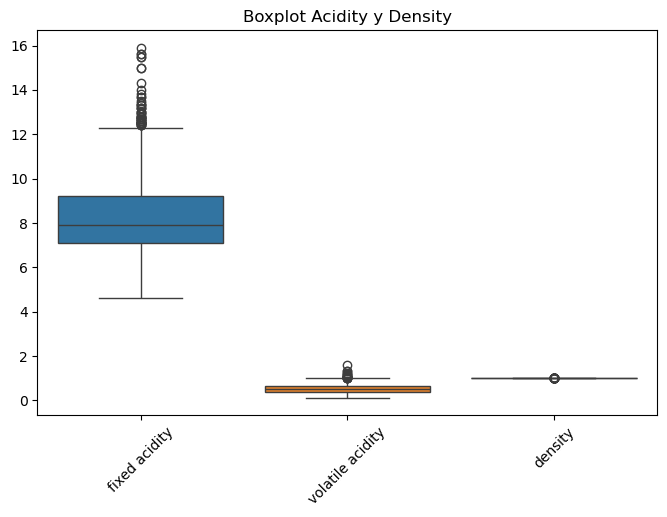

In [24]:
# con el diagrama de cubos vamos a buscar de manera grafica los valores atipicos y encontramos que en fixed accid la mayoria estan por fuera de los perceptiles. 
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(data=data[['fixed acidity', 'volatile acidity', 'density']])
plt.xticks(rotation=45)
plt.title('Boxplot Acidity y Density')
plt.show()

In [39]:
predictors_col = ["citric acid","residual sugar", "density" , "alcohol"]
target_col= ['quality']

In [40]:
predictors = data [predictors_col]
target = data [target_col]

In [36]:
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [41]:
predictors

,citric acid,residual sugar,density,alcohol
0,0.00,1.9,0.99780,9.4
1,0.00,2.6,0.99680,9.8
2,0.04,2.3,0.99700,9.8
3,0.56,1.9,0.99800,9.8
4,0.00,1.9,0.99780,9.4
...,...,...,...,...
1594,0.08,2.0,0.99490,10.5
1595,0.10,2.2,0.99512,11.2
1596,0.13,2.3,0.99574,11.0
1597,0.12,2.0,0.99547,10.2


In [43]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [46]:
#buscamos la correlación etre las bariables numericos y debemos tenes en cuenta que dicha correlación debe estr entre -1 y 1. podemos encontrar que la correlacione entre ellas es muy baja.
corr = predictors.corr()
corr

,citric acid,residual sugar,density,alcohol
citric acid,1.000000,0.143577,0.364947,0.109903
residual sugar,0.143577,1.000000,0.355283,0.042075
density,0.364947,0.355283,1.000000,-0.496180
alcohol,0.109903,0.042075,-0.496180,1.000000


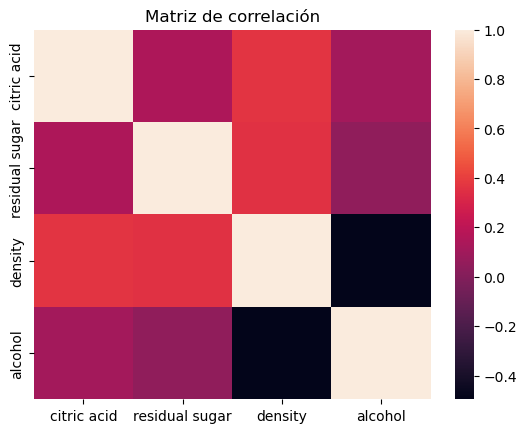

In [47]:
# de manera grafica encontramos como la menor correlación , se encuentra entre Alcohol y density
sns.heatmap(corr)
plt.title('Matriz de correlación')
plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
tree = DecisionTreeClassifier()


In [55]:
arbol = tree.fit(X_train, y_train)

In [57]:
from sklearn.tree import plot_tree

[Text(0.597900714180533, 0.9736842105263158, 'x[3] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.359161021940804, 0.9210526315789473, 'x[3] <= 9.925\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.4785308680606685, 0.9473684210526316, 'True  '),
 Text(0.14021314975703136, 0.868421052631579, 'x[2] <= 0.997\ngini = 0.492\nsamples = 539\nvalue = [4, 20, 350, 157, 8, 0]'),
 Text(0.06552790457959064, 0.8157894736842105, 'x[0] <= 0.265\ngini = 0.383\nsamples = 163\nvalue = [1.0, 7.0, 124.0, 31.0, 0.0, 0.0]'),
 Text(0.03799145928434693, 0.7631578947368421, 'x[1] <= 1.25\ngini = 0.323\nsamples = 136\nvalue = [1, 5, 110, 20, 0, 0]'),
 Text(0.035635399793844794, 0.7105263157894737, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0]'),
 Text(0.040347518774849066, 0.7105263157894737, 'x[3] <= 9.65\ngini = 0.313\nsamples = 135\nvalue = [0, 5, 110, 20, 0, 0]'),
 Text(0.019437490796642615, 0.6578947368421053, 'x[1] <= 1.

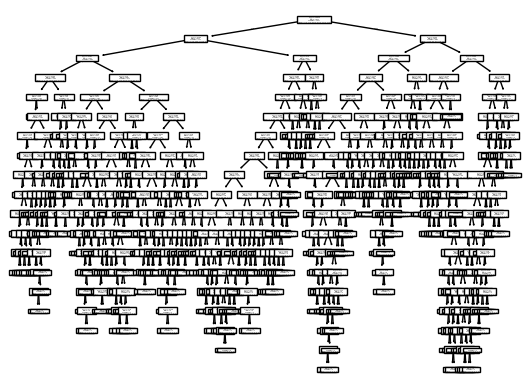

In [58]:
plot_tree(arbol)

In [59]:
predicciones = arbol.predict(X_test)

In [60]:
predicciones

array([7, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 6, 7, 5, 6, 5, 5,
       6, 5, 5, 5, 6, 5, 6, 6, 6, 7, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6,
       5, 7, 6, 6, 5, 6, 5, 6, 7, 5, 7, 6, 5, 7, 6, 5, 5, 5, 5, 6, 6, 7,
       6, 5, 5, 5, 6, 6, 7, 5, 5, 4, 5, 5, 5, 5, 7, 7, 5, 5, 6, 6, 6, 6,
       5, 6, 6, 6, 7, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 7, 7, 5, 5, 5, 6,
       6, 6, 5, 5, 5, 7, 7, 7, 6, 5, 5, 6, 5, 7, 5, 6, 5, 5, 6, 7, 6, 5,
       6, 7, 4, 5, 7, 5, 6, 7, 6, 5, 6, 5, 7, 4, 6, 5, 5, 5, 5, 7, 5, 6,
       5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 7, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 7, 6,
       5, 6, 6, 6, 6, 7, 5, 5, 6, 4, 6, 5, 6, 5, 5, 6, 6, 5, 6, 7, 5, 6,
       5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6,
       7, 5, 5, 6, 6, 7, 5, 7, 6, 5, 5, 5, 7, 5, 6, 5, 5, 6, 6, 6, 7, 5,
       6, 5, 6, 7, 5, 6, 5, 5, 5, 5, 6, 3, 7, 5, 5, 5, 5, 6, 5, 5, 6, 5,
       6, 7, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5,

In [64]:
# se examina la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7
Actual,,,,,
3,0,0,1,0,0
4,0,2,4,2,0
5,1,1,105,36,3
6,0,1,32,73,18
7,0,1,6,12,16
8,0,0,1,2,3


In [67]:
from sklearn.metrics import accuracy_score

In [69]:
#encontramos que el accuracy es muy bajo segun las predicciones de y_test
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.6125

In [71]:
from sklearn.metrics import precision_score

In [75]:
precision = precision_score(y_test,predicciones, average = 'weighted')
precision

C:\Users\ecaro\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.601568456375839

In [76]:
from sklearn.metrics import recall_score

In [80]:
recall = recall_score(y_test,predicciones, average = 'weighted')
recall

0.6125

In [82]:
from sklearn.metrics import f1_score

In [83]:
f1=f1_score (y_test,predicciones, average = 'weighted')
f1

0.6063559452935602